In [121]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [122]:
# Analysis parameters
school_radius = 0.25 # in miles. Crimes commited within this distance of a school are tagged is_near_school=True


In [123]:
# Import data

df = pd.DataFrame()

years = np.arange(2008, 2019, 2)

for year in years:
    data_file = 'data/' + str(year) + '_crimes_with_dist.csv'
    data = pd.read_csv(data_file)
    print(f'loaded {year} crimes data with {len(data)} records.')

    # Filter to relevant crime types
    data = data.loc[data['primary_type'].isin(['THEFT', 'BATTERY', 'NARCOTICS', 'WEAPONS VIOLATION', 'CRIMINAL DAMAGE'])]

    # Tag near schools
    data['is_near_school'] = data['nearest_school_dist'] < school_radius

    # Group by counts by crime type for all chicago
    temp = data.reset_index()
    df_allcrimes = temp[['primary_type', 'year', 'case_number']]
    df_allcrimes = df_allcrimes.groupby(['primary_type', 'year']).count()
    df_allcrimes = df_allcrimes.rename(columns = {'case_number': 'crime_count_all'})
    df_allcrimes = df_allcrimes.reset_index()
    
    # Group by counts by crime type near schools
    df_schcrimes = temp[['primary_type', 'year', 'case_number']].loc[temp['is_near_school']==True]
    df_schcrimes = df_schcrimes.groupby(['primary_type', 'year']).count()
    df_schcrimes = df_schcrimes.rename(columns = {'case_number': 'crime_count_sch'})
    df_schcrimes = df_schcrimes.reset_index()
    
    # Merge all Chicago and near schools for current year
    df_thisyear = df_allcrimes.merge(df_schcrimes, on='primary_type')
    df_thisyear = df_thisyear.drop(columns = 'year_y')
    
    # Clean column names and append this year's values to "df"
    df_thisyear = df_thisyear.rename(columns= {'year_x':'year'})
    df = df.append(df_thisyear)

df
    

loaded 2008 crimes data with 419783 records.
loaded 2010 crimes data with 369786 records.
loaded 2012 crimes data with 335066 records.
loaded 2014 crimes data with 273573 records.
loaded 2016 crimes data with 266448 records.
loaded 2018 crimes data with 259784 records.


,primary_type,year,crime_count_all,crime_count_sch
0,BATTERY,2008,75425,14666
1,CRIMINAL DAMAGE,2008,52162,8618
2,NARCOTICS,2008,45053,9238
3,THEFT,2008,86342,15060
4,WEAPONS VIOLATION,2008,3823,782
0,BATTERY,2010,65369,12674
1,CRIMINAL DAMAGE,2010,40613,6756
2,NARCOTICS,2010,43380,8706
3,THEFT,2010,76684,13919
4,WEAPONS VIOLATION,2010,3704,733


In [124]:
# Normalize by area
df['crime_rate_all'] = df['crime_count_all'] / 234.0
df['crime_rate_sch'] = df['crime_count_sch'] / (208 * school_radius**2 * 3.1415)

df.to_csv('rates-by-crime-and-year.csv')


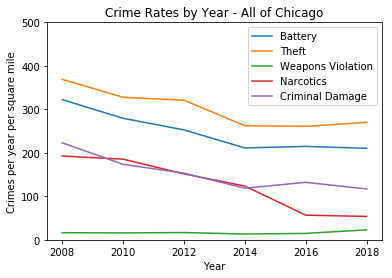

In [127]:
# Make plot all of Chicago
bat_plot = df.loc[df['primary_type'] == 'BATTERY']
plt.plot(bat_plot['year'], bat_plot['crime_rate_all'], label = 'Battery')

theft_plot = df.loc[df['primary_type'] == 'THEFT']
plt.plot(theft_plot['year'], theft_plot['crime_rate_all'], label = 'Theft')

weap_plot = df.loc[df['primary_type'] == 'WEAPONS VIOLATION']
plt.plot(weap_plot['year'], weap_plot['crime_rate_all'], label = 'Weapons Violation')

narc_plot = df.loc[df['primary_type'] == 'NARCOTICS']
plt.plot(narc_plot['year'], narc_plot['crime_rate_all'], label = 'Narcotics')

dmg_plot = df.loc[df['primary_type'] == 'CRIMINAL DAMAGE']
plt.plot(dmg_plot['year'], dmg_plot['crime_rate_all'], label = 'Criminal Damage')

plt.legend()
plt.ylim(0, 500)
plt.title('Crime Rates by Year - All of Chicago')
plt.xlabel('Year')
plt.ylabel('Crimes per year per square mile')
plt.savefig('crimes-by-year-all.png')
plt.show()



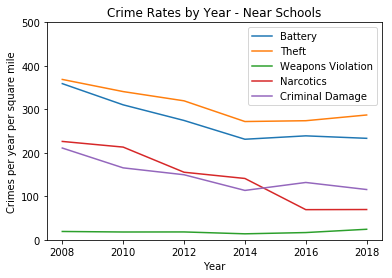

In [126]:
# Make plot near schools
bat_plot = df.loc[df['primary_type'] == 'BATTERY']
plt.plot(bat_plot['year'], bat_plot['crime_rate_sch'], label = 'Battery')

theft_plot = df.loc[df['primary_type'] == 'THEFT']
plt.plot(theft_plot['year'], theft_plot['crime_rate_sch'], label = 'Theft')

weap_plot = df.loc[df['primary_type'] == 'WEAPONS VIOLATION']
plt.plot(weap_plot['year'], weap_plot['crime_rate_sch'], label = 'Weapons Violation')

narc_plot = df.loc[df['primary_type'] == 'NARCOTICS']
plt.plot(narc_plot['year'], narc_plot['crime_rate_sch'], label = 'Narcotics')

dmg_plot = df.loc[df['primary_type'] == 'CRIMINAL DAMAGE']
plt.plot(dmg_plot['year'], dmg_plot['crime_rate_sch'], label = 'Criminal Damage')

plt.legend()
plt.ylim(0, 500)
plt.title('Crime Rates by Year - Near Schools')
plt.xlabel('Year')
plt.ylabel('Crimes per year per square mile')
plt.savefig('crimes-by-year-nearschools.png')
plt.show()




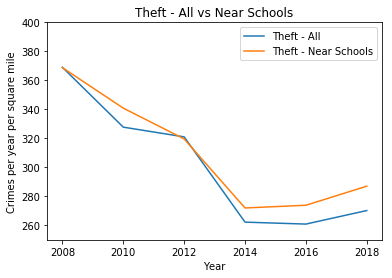

In [128]:
# Make THEFT plot near schools

theft_plot_all = df.loc[df['primary_type'] == 'THEFT']
plt.plot(theft_plot_all['year'], theft_plot_all['crime_rate_all'], label = 'Theft - All')

theft_plot_sch = df.loc[df['primary_type'] == 'THEFT']
plt.plot(theft_plot_sch['year'], theft_plot_sch['crime_rate_sch'], label = 'Theft - Near Schools')

plt.legend()
plt.ylim(250, 400)
plt.title('Theft - All vs Near Schools')
plt.xlabel('Year')
plt.ylabel('Crimes per year per square mile')
plt.savefig('theft-by-year.png')
plt.show()



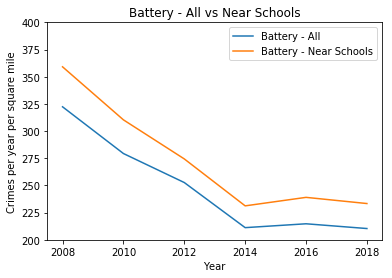

In [129]:
# Make Battery plot near schools

theft_plot_all = df.loc[df['primary_type'] == 'BATTERY']
plt.plot(theft_plot_all['year'], theft_plot_all['crime_rate_all'], label = 'Battery - All')

theft_plot_sch = df.loc[df['primary_type'] == 'BATTERY']
plt.plot(theft_plot_sch['year'], theft_plot_sch['crime_rate_sch'], label = 'Battery - Near Schools')

plt.legend()
plt.ylim(200, 400)
plt.title('Battery - All vs Near Schools')
plt.xlabel('Year')
plt.ylabel('Crimes per year per square mile')
plt.savefig('battery-by-year.png')
plt.show()


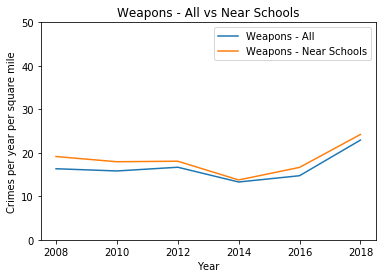

In [133]:
# Make Weapons plot near schools

weap_plot_all = df.loc[df['primary_type'] == 'WEAPONS VIOLATION']
plt.plot(weap_plot_all['year'], weap_plot_all['crime_rate_all'], label = 'Weapons - All')

weap_plot_sch = df.loc[df['primary_type'] == 'WEAPONS VIOLATION']
plt.plot(weap_plot_sch['year'], weap_plot_sch['crime_rate_sch'], label = 'Weapons - Near Schools')

plt.legend()
plt.ylim(0, 50)
plt.title('Weapons - All vs Near Schools')
plt.xlabel('Year')
plt.ylabel('Crimes per year per square mile')
plt.savefig('weapons-by-year.png')
plt.show()


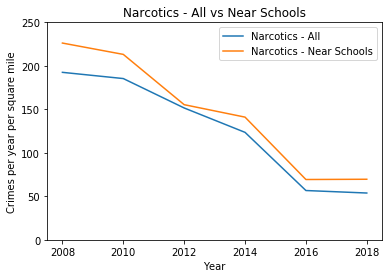

In [131]:
# Make Narcotics plot near schools

narc_plot_all = df.loc[df['primary_type'] == 'NARCOTICS']
plt.plot(narc_plot_all['year'], narc_plot_all['crime_rate_all'], label = 'Narcotics - All')

narc_plot_sch = df.loc[df['primary_type'] == 'NARCOTICS']
plt.plot(narc_plot_sch['year'], narc_plot_sch['crime_rate_sch'], label = 'Narcotics - Near Schools')

plt.legend()
plt.ylim(0, 250)
plt.title('Narcotics - All vs Near Schools')
plt.xlabel('Year')
plt.ylabel('Crimes per year per square mile')
plt.savefig('narcotics-by-year.png')
plt.show()



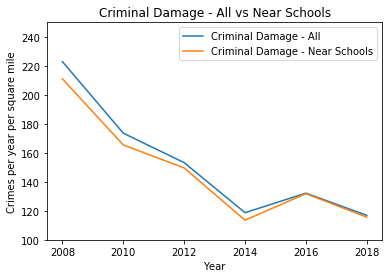

In [132]:

# Make Damage plot near schools

dmg_plot_all = df.loc[df['primary_type'] == 'CRIMINAL DAMAGE']
plt.plot(dmg_plot_all['year'], dmg_plot_all['crime_rate_all'], label = 'Criminal Damage - All')

dmg_plot_sch = df.loc[df['primary_type'] == 'CRIMINAL DAMAGE']
plt.plot(dmg_plot_sch['year'], dmg_plot_sch['crime_rate_sch'], label = 'Criminal Damage - Near Schools')

plt.legend()
plt.ylim(100, 250)
plt.title('Criminal Damage - All vs Near Schools')
plt.xlabel('Year')
plt.ylabel('Crimes per year per square mile')
plt.savefig('dmg-by-year.png')
plt.show()

